In [1]:
''' import '''
import scipy.io as io
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In [2]:
''' load data '''
data = io.loadmat('./data/hw2_prob2.mat')

A = data['A']
d = data['d']
d_up = data['d_up']

M, N = A.shape

In [3]:
''' hyper param '''
ALPHA = 0.01
BETA = 0.8
MAXITERS = 2000

In [4]:
''' without constraint '''

# gradient desent method
f_hist_wo = []

x = np.zeros((N, 1))

for i in range(MAXITERS):

    # f, grad
    f = 1/2*la.norm(A@x - d)**2
    grad = A.T@(A@x - d)

    # search direction (delta_x)
    delta_x = -grad

    # step size (t)
    t = 1
    # line search
    while (1/2*la.norm(A@(x + t*delta_x) - d)**2 > f + ALPHA*t*grad.T@delta_x):
        t = BETA*t

    # update x (x_k+1 = x_k + t*delta_x)
    x = x + t*delta_x
    
    # history
    f_hist_wo.append(f)

    print(f'i = {i}, f = {f}')

# optimal
x_wo = x

i = 0, f = 5412600.0
i = 1, f = 1600424.9623213222
i = 2, f = 638248.3353030797
i = 3, f = 352950.6504152574
i = 4, f = 243655.2659800006
i = 5, f = 188374.50694571788
i = 6, f = 154050.51144931559
i = 7, f = 130026.50462984527
i = 8, f = 112040.11954708704
i = 9, f = 98012.69927394381
i = 10, f = 86771.69814553257
i = 11, f = 77586.96752416404
i = 12, f = 69971.1526829981
i = 13, f = 63581.81541937458
i = 14, f = 58168.807878054766
i = 15, f = 53543.93993712271
i = 16, f = 49562.44471018291
i = 17, f = 46111.051785047086
i = 18, f = 43099.955709531656
i = 19, f = 40457.19578044752
i = 20, f = 38124.59873321252
i = 21, f = 36054.77704736983
i = 22, f = 34208.86565461025
i = 23, f = 32554.790080020044
i = 24, f = 31065.92575139011
i = 25, f = 29720.050314224838
i = 26, f = 28498.518441285793
i = 27, f = 27385.60743408605
i = 28, f = 26367.995090025674
i = 29, f = 25434.34076199344
i = 30, f = 24574.947448293708
i = 31, f = 23781.48787863202
i = 32, f = 23046.781411471442
i = 33, f = 223

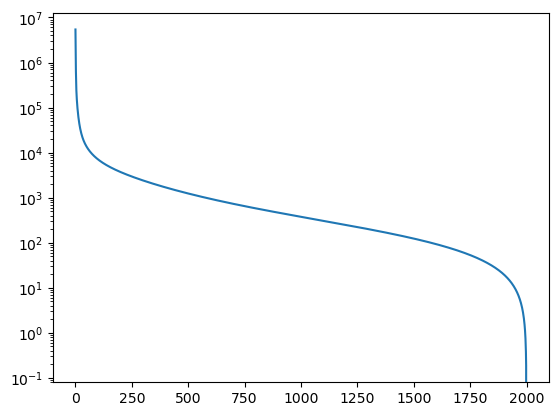

In [5]:
# plot
plt.semilogy(f_hist_wo - f_hist_wo[-1])
plt.show()

In [6]:
''' with constraint '''

# gradient desent method + log-barrier
f_hist_w = []

x = np.zeros((N, 1))
t_lb = 1 # for log-barrier

for i in range(MAXITERS):

    # f, grad
    f = t_lb/2*la.norm(A@x - d)**2 - np.sum(np.log(d_up - A@x))
    grad = t_lb*A.T@(A@x - d) + A.T@(1/(d_up - A@x))

    # search direction (delta_x)
    delta_x = -grad

    # step size (t)
    t = 1
    # feasibility check
    while (np.any(A@(x + t*delta_x) >= d_up)):
        t = BETA*t
    # line search
    while (t_lb/2*la.norm(A@(x + t*delta_x) - d)**2 - np.sum(np.log(d_up - A@(x + t*delta_x))) > f + ALPHA*t*grad.T@delta_x):
        t = BETA*t

    # update x (x_k+1 = x_k + t*delta_x)
    x = x + t*delta_x
    
    # history
    f_hist_w.append(f)

    print(f'i = {i}, f = {f}')

# optimal
x_w = x

i = 0, f = 5400189.706904169
i = 1, f = 1590606.9882313954
i = 2, f = 630628.8764116092
i = 3, f = 618115.5102821878
i = 4, f = 616069.1075622776
i = 5, f = 615982.1724118643
i = 6, f = 536021.2005367466
i = 7, f = 526134.6146779793
i = 8, f = 525100.5937801122
i = 9, f = 524992.4443734506
i = 10, f = 524791.7588748139
i = 11, f = 524781.6194212947
i = 12, f = 523957.7885377605
i = 13, f = 523823.3755116513
i = 14, f = 413585.3638901054
i = 15, f = 409172.19152829726
i = 16, f = 399458.9299641621
i = 17, f = 399368.04567500105
i = 18, f = 398846.7038626523
i = 19, f = 398792.8504772349
i = 20, f = 398788.9803336001
i = 21, f = 398439.5665793916
i = 22, f = 398436.7546326337
i = 23, f = 398259.8072752131
i = 24, f = 387373.8786853078
i = 25, f = 386840.6149109897
i = 26, f = 386755.0528209963
i = 27, f = 375861.3302451046
i = 28, f = 375534.71645182854
i = 29, f = 370076.7503412638
i = 30, f = 369578.41104202584
i = 31, f = 365306.0702786303
i = 32, f = 364690.0511543519
i = 33, f = 364

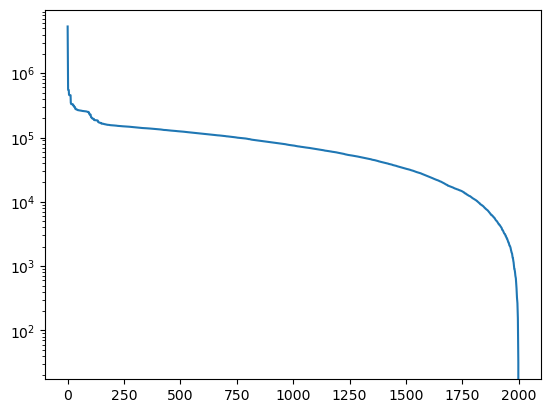

In [7]:
# plot
plt.semilogy(f_hist_w - f_hist_w[-1])
plt.show()

In [8]:
''' save '''
# np.savez('./opt/hw2_2.npz', A=A, x_wo=x_wo, x_w=x_w, f_hist_wo=f_hist_wo, f_hist_w=f_hist_w)

''' load '''
data = np.load('./opt/hw2_2.npz')

A = data['A']
x_wo = data['x_wo']
x_w = data['x_w']
f_hist_wo = data['f_hist_wo']
f_hist_w = data['f_hist_w']

In [9]:
''' DVH '''
def get_DVH_PTV(beam_kernel, beam_intensity):

    dose = beam_kernel@beam_intensity

    # differential DVH
    bins = np.linspace(0, 100, 1000)
    diff_DVH, _ = np.histogram(dose, bins=bins)

    # cumulative DVH
    cum_DVH = np.flip(np.cumsum(np.flip(diff_DVH)))
    cum_DVH = cum_DVH / np.max(cum_DVH) # normalize

    return cum_DVH

In [10]:
# calc
dvh_wo = get_DVH_PTV(A, x_wo)
dvh_w = get_DVH_PTV(A, x_w)

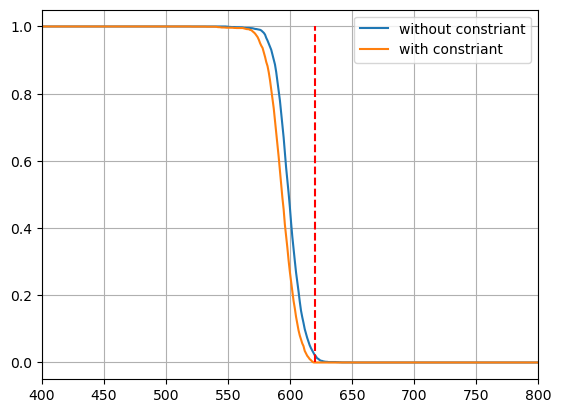

In [13]:
# plot
plt.plot(dvh_wo, label='without constriant')
plt.plot(dvh_w, label='with constriant')
plt.vlines(620, 0, 1, linestyle='--', color='r')
plt.xlim([400, 800])
plt.legend()
plt.grid()
plt.show()